In [12]:
from datetime import datetime

import pandas as pd
import numpy as np

import codecs, json 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import scipy
import time

In [22]:
with open('/Users/calmaleh/Desktop/school/project_course/jeppesen/data_rich_ac.bsad') as json_file:
    json_data = json.load(json_file)

frames = []
for j in range(len(json_data['tables'])):
    df = pd.DataFrame(np.array(json_data['tables'][j]['table'])[:,:], 
                           columns = json_data['tables'][j]['header']['variables'][:])
    df['state'] = json_data['tables'][j]['header']['flightphase']
    if df['state'][0] == 'cruise':
        frames.append(df)
    
df = pd.concat(frames,ignore_index=True)
df = df[['DISA','ALTITUDE','MASS','MACH','FUELFLOW']]

scaler = MinMaxScaler()
df = scaler.fit_transform(df)

df = pd.DataFrame(df, columns = ['DISA','ALTITUDE','MASS','MACH','FUELFLOW'])

X = df.drop(['FUELFLOW'], axis=1)
y = df.FUELFLOW

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Time:  34.69825315475464
MSE:  0.005805360429469572


Text(0.5, 1.0, 'Residual plot (y interpolated - y actual)')

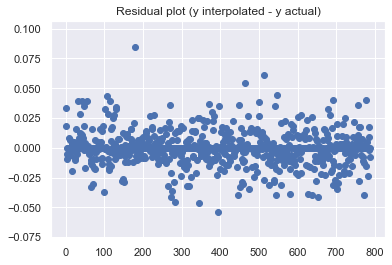

In [52]:
start = time.time()

output = np.zeros((len(y_test), 2))

for i in range(len(X_test)):
    test = X_test.iloc[i]
    y_check = y_test.iloc[i]
    
    X_train_1 = X_train
    X_train_1['distance'] = X_train_1.sub(test).pow(2).sum(1).pow(0.5) # maybe cutoff based on input

    end = 16
    z = X_train_1.sort_values('distance').iloc[0:end]
    z = z.drop(['distance'],axis = 1)
    z = z.reset_index()
    z.columns = ['index_', 'DISA', 'ALTITUDE', 'MASS', 'MACH']
    y_train.columns = ['index_', 'FUELFLOW']
    z = z.join(y_train, on = 'index_', how = 'left')
    z = z.drop(['index_'], axis=1)

    z_inter = z[0:1].append(test)
    z_inter = z_inter.append(z[2:end])

    y_inter = z_inter.interpolate(method = 'linear')['FUELFLOW']
    
    output[i,0] = y_check
    output[i,1] = y_inter.iloc[1]
    
end = time.time()

print('Time: ',end - start)
print('MSE: ', mean_squared_error(output[0], output[1]))

plt.scatter(np.arange(0,len(output)),output[:,0]-output[:,1])
plt.title('Residual plot (y interpolated - y actual)')

/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


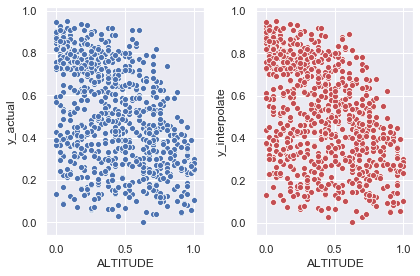

In [53]:
X_test['y_interpolate'] = output[:,1]
X_test['y_actual'] = output[:,0]

plt.subplot(1,2,1)
sns.scatterplot(x='ALTITUDE', y='y_actual', data = X_test, color ='b')
plt.subplot(1,2,2)
sns.scatterplot(x='ALTITUDE', y= 'y_interpolate', data = X_test, color ='r')
plt.tight_layout()

In [55]:
import scipy_interpolation_functions

ModuleNotFoundError: No module named 'scipy_interpolation_functions'